# 연습문제 4번

## clustering

## k-means clustering Algorithm

### load data 4.0

In [33]:
import pandas as pd
import numpy as np

raw_data = {
    'density': [0.697, 0.774, 0.634, 0.608, 0.556, 0.403, 0.481, 0.437, 0.666, 0.243, 0.245, 0.343, 0.639, 0.657, 0.360, 0.593, 
                0.719, 0.359, 0.339, 0.282, 0.748, 0.714, 0.483, 0.478, 0.525, 0.751, 0.532, 0.473, 0.725, 0.446],
    'sugar_ratio': [0.460, 0.376, 0.264, 0.318, 0.215, 0.237, 0.149, 0.211, 0.091, 0.267, 0.057, 0.099, 0.161, 0.198, 0.370, 
                   0.042, 0.103, 0.188, 0.241, 0.257, 0.232, 0.346, 0.312, 0.437, 0.369, 0.489, 0.472, 0.376, 0.445, 0.459]
}

data = pd.DataFrame(raw_data, index=range(1, 31))
data

,density,sugar_ratio
1,0.697,0.460
2,0.774,0.376
3,0.634,0.264
4,0.608,0.318
5,0.556,0.215
6,0.403,0.237
7,0.481,0.149
8,0.437,0.211
9,0.666,0.091
10,0.243,0.267


### training

In [43]:
def clustering(D, u_index):
    u = D.loc[u_index]
    k = len(u)
    m = len(D)
    
    while True:
        c = [[] for i in range(k)]
        
        for i in range(1, m+1):
            d = np.sqrt(np.sum((D.loc[i] - u)**2, axis=1))
            la = np.argmin(d)
            c[la].append(i)
        
        du_lst = []
        for j in range(k):
            c_j = D.loc[c[j]]
            u_j = np.mean(c_j, axis=0)
            du = np.sqrt(np.sum((u.iloc[j] - u_j)**2))
            du_lst += [du]
            u.iloc[j] = u_j
        if sum(du_lst) == 0:
            return c 

### visualize

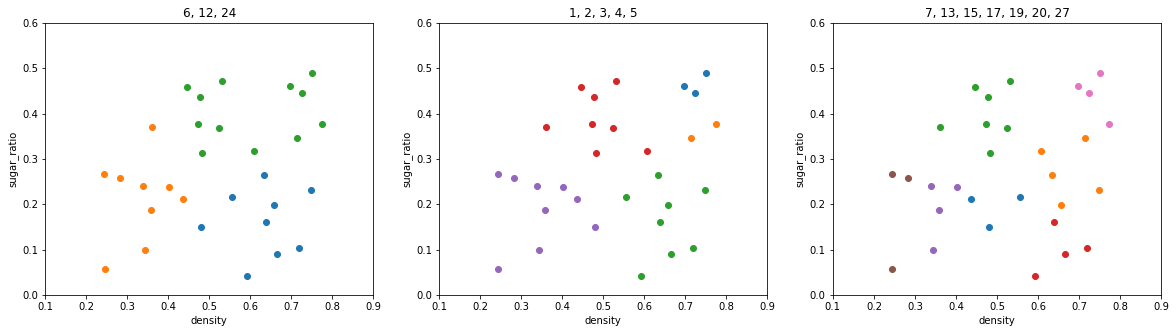

In [57]:
import matplotlib.pyplot as plt

def visualize_clustering(D, u_index):
    for label, c_id in enumerate(clustering(D, u_index)):
        D_ = D.loc[c_id]
        plt.scatter(D_['density'], D_['sugar_ratio'], label=label)
    plt.xticks(np.arange(0.1, 1, 0.1))
    plt.yticks(np.arange(0, 0.7, 0.1))
    plt.xlabel('density')
    plt.ylabel('sugar_ratio')

plt.figure(figsize=(20, 5))

plt.subplot(131)
visualize_clustering(data, [6, 12, 24])
plt.title("6, 12, 24")

plt.subplot(132)
visualize_clustering(data, [1, 2, 3, 4, 5])
plt.title("1, 2, 3, 4, 5")

plt.subplot(133)
visualize_clustering(data, [7, 13, 15, 17, 19, 20, 27])
plt.title("7, 13, 15, 17, 19, 20, 27")


plt.show()